# Project: Netflix Dataset

## Table of Contents
<ul>
<li><a href="#cleaing">Data Cleaning</a></li>
<li><a href="#eda">Cleaning & Exploratory</a></li>
<li><a href="#popular content">What are the  most popular type? TV shows or Movies?</a></li>
<li><a href="#highestCoun">Which countries have the highest number of TV shows and movies available on Netflix?</a></li>
<li><a href="#OverTime">How has the number of TV shows and Movies  changed over time?</a></li>
<li><a href="#directors">Which directors have worked on the most TV shows and movies on Netflix?</a></li>
<li><a href="#avgduration">What is the average duration of TV shows and movies on Netflix?</a></li>
<li><a href="#distRating">What is the distribution of movie and TV show ratings on Netflix?</a></li>
<li><a href="#patterns">Are there any patterns or trends in the release dates of TV shows and movies on Netflix?</a></li>
<li><a href="#gen">What is the most Genres for Movies and TV Shows On Netflix?</a></li>
<li><a href="#top">What is the top Countries have diffrenet categories of genres?and whata bout Egypt?</a></li>
<li><a href="#years_needed"> How many years needed to add show to Netflix from it's releas..?</a></li>
</ul>

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("P:/PROJECTS/Netflix_EDA/netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


<a id='cleaning'></a>
### data  cleaning

In [6]:
df.shape

(8790, 10)

In [7]:
# check null values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [8]:
# check what every column have
for col in df.columns:
    print( col,':', df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

show_id : 8790
s1       1
s7990    1
s7982    1
s7984    1
s7986    1
Name: show_id, dtype: int64

********************

type : 2
Movie      6126
TV Show    2664
Name: type, dtype: int64

********************

title : 8787
9-Feb                   2
15-Aug                  2
22-Jul                  2
Dick Johnson Is Dead    1
SGT. Will Gardner       1
Name: title, dtype: int64

********************

director : 4528
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Name: director, dtype: int64

********************

country : 86
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Name: country, dtype: int64

********************

date_added : 1713
1/1/2020      110
11/1/2019      91
3/1/2018       75
12/31/2019     74
10/1/2018      71
Name: date_added, dtype: int64

********************

release_year : 74
2018    1146
201

In [9]:
# a statistical view 
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
df.describe(include='object') 

,show_id,type,title,director,country,date_added,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790,8790,8790
unique,8790,2,8787,4528,86,1713,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,3205,1791,362


In [11]:
# check duplicated record
df.duplicated().sum()  # df[df.duplicated()]

0

In [12]:
# check data type
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

* date_added column is an object!

In [13]:
# change data_added column format
df['date_added'] = pd.to_datetime(df['date_added'])

In [14]:
df.head(3)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"


# EDA
<a id='eda'></a>

<a id='popular content'></a>
### What are the  most popular type? TV shows or Movies?

In [15]:
df['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

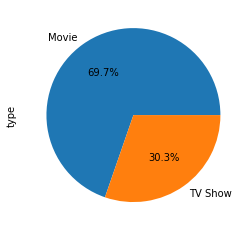

In [16]:
df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%');

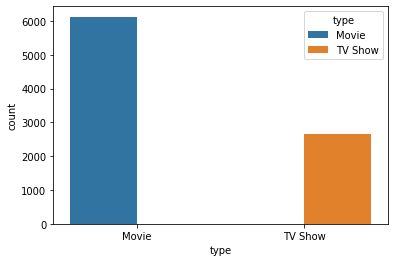

In [17]:
sns.countplot(x= 'type' , data =df , hue= 'type');

* Movie is more popular than TV show

<a id='highestCoun'></a>
### Which countries have the highest number of TV shows and Movies available on Netflix?

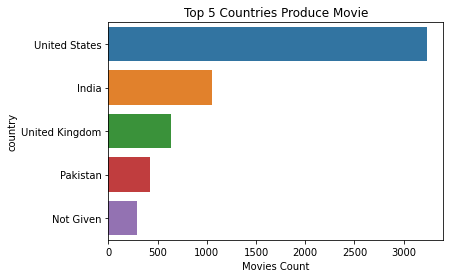

In [18]:
sns.countplot(y=df['country'] , data =df[df['type']=='Movie'] ,order =df['country'].value_counts().index[:5])
plt.xlabel('Movies Count')
plt.title('Top 5 Countries Produce Movie');

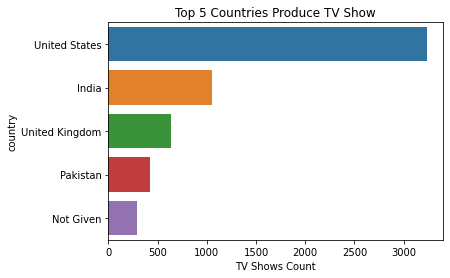

In [19]:
sns.countplot(y=df['country'] , data =df[df['type']=='TV Show'] ,order =df['country'].value_counts().index[:5])
plt.xlabel('TV Shows Count')
plt.title('Top 5 Countries Produce TV Show');

#### notes:
* United States is the top leaader in both movie and TV shows followed by India
* Some Movie/TV show doesn't have a label ==>> " labeled with 'Not Given' "

In [20]:
#sns.countplot(y='country' , data =df[df['type']=='TV Show'] ,order =df['country'].value_counts().index[:5])
# y=df['country'] != y ='country' ==>> Not orderd # run to see deference

<a id='OverTime'></a>
### How has the number of TV shows and Movies  changed over time?

In [21]:
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-22
4      2021-09-24
          ...    
8785   2017-01-17
8786   2018-09-13
8787   2016-12-15
8788   2018-06-23
8789   2018-06-07
Name: date_added, Length: 8790, dtype: datetime64[ns]

In [22]:
# deravative year column from 'date_added'
df['date_year']= df['date_added'].dt.year
df['date_year'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: date_year, dtype: int64

In [23]:
type_year = (df.groupby(['type', 'date_year'])['title'])

In [24]:
type_year.head()

0                   Dick Johnson Is Dead
1                              Ganglands
2                          Midnight Mass
3       Confessions of an Invisible Girl
4                                Sankofa
                      ...               
8423                     Dinner for Five
8470                         Gossip Girl
8609                 Pee-wee's Playhouse
8653        Russell Peters vs. the World
8768                               Weeds
Name: title, Length: 103, dtype: object

In [25]:
type_year = (df.groupby(['type','date_year'])['title'].size())

In [26]:
type_year.head(20)

type     date_year
Movie    2008            1
         2009            2
         2010            1
         2011           13
         2012            3
         2013            6
         2014           19
         2015           56
         2016          251
         2017          836
         2018         1237
         2019         1424
         2020         1284
         2021          993
TV Show  2008            1
         2013            5
         2014            5
         2015           26
         2016          175
         2017          349
Name: title, dtype: int64

In [27]:
type_year = (df.groupby(['type', 'date_year'])['title'].size()).reset_index()

In [28]:
type_year.head(20)

,type,date_year,title
0,Movie,2008,1
1,Movie,2009,2
2,Movie,2010,1
3,Movie,2011,13
4,Movie,2012,3
5,Movie,2013,6
6,Movie,2014,19
7,Movie,2015,56
8,Movie,2016,251
9,Movie,2017,836


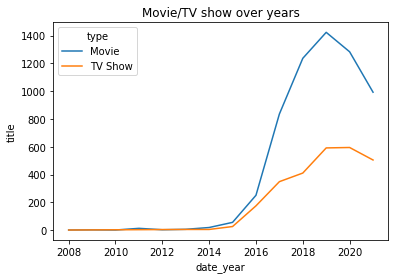

In [29]:
sns.lineplot(x = 'date_year' ,y = 'title',data =type_year ,hue = 'type')
plt.title("Movie/TV show over years")
plt.show();

#### notes:
* after 2015 Movie have much more better Growth Rate than TV Show

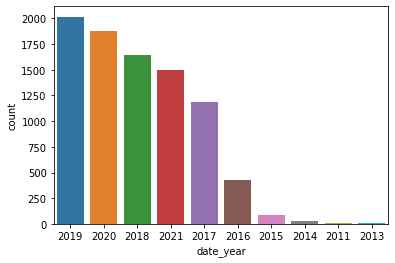

In [30]:
# which year have most Movie and TV Show

sns.countplot(x='date_year',data=df,order=df['date_year'].value_counts().index[:10])
plt.show();

* 2019 is the most year were Movie/TV show

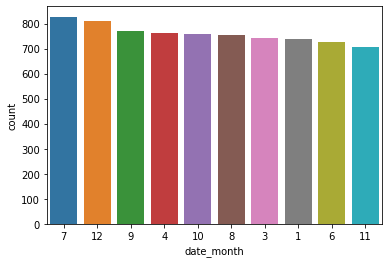

In [31]:
# which month have most Movie and TV Show

df['date_month']= df['date_added'].dt.month
sns.countplot(x='date_month',data=df,order=df['date_month'].value_counts().index[:10])
plt.show();

<a id='directors'></a>
### Which  directors have worked on the most TV shows and movies on Netflix?

In [32]:
df['director'].value_counts()

Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: director, Length: 4528, dtype: int64

#### notes:
* Most of Movies and TV Show doesn't have Director name 

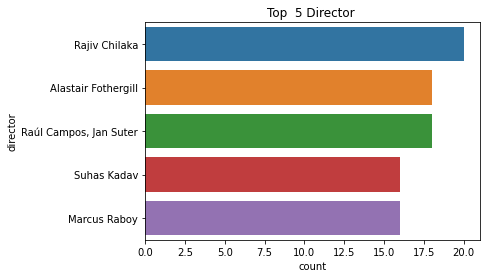

In [33]:
sns.countplot(y = df['director'], order=df['director'].value_counts().index[1:6])
plt.title('Top  5 Director ') # without 'Not given' 
plt.show()

<a id='avgduration'></a>
### What is the average duration of TV shows and Movies on Netflix?

In [34]:
df['duration']

0          90 min
1        1 Season
2        1 Season
3          91 min
4         125 min
          ...    
8785    2 Seasons
8786    3 Seasons
8787     1 Season
8788     1 Season
8789     1 Season
Name: duration, Length: 8790, dtype: object

In [35]:
df['duration'].str.split(' ').str[0]

0        90
1         1
2         1
3        91
4       125
       ... 
8785      2
8786      3
8787      1
8788      1
8789      1
Name: duration, Length: 8790, dtype: object

* Not distinguish between movie and show so let's try another approach

In [36]:
df[df.type == 'TV Show'].head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,date_year,date_month
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",2021,9
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,9
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",2021,9


In [37]:
df[df.type == 'TV Show']['duration']

1        1 Season
2        1 Season
5       9 Seasons
17       1 Season
18       1 Season
          ...    
8785    2 Seasons
8786    3 Seasons
8787     1 Season
8788     1 Season
8789     1 Season
Name: duration, Length: 2664, dtype: object

In [38]:
df[df.type == 'TV Show']['duration'].str.split(' ').str[0].astype(int).head()

1     1
2     1
5     9
17    1
18    1
Name: duration, dtype: int32

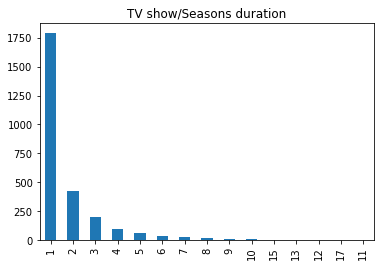

In [39]:
(df[df.type == 'TV Show']['duration'].str.split(' ').str[0].astype(int)).value_counts().plot(kind='bar');
plt.title('TV show/Seasons duration');

* Most of The TV shows have one season

In [40]:
# let's do same thing for Movie
df[df.type == 'Movie']['duration'].head()

0     90 min
3     91 min
4    125 min
6    104 min
7     87 min
Name: duration, dtype: object

In [41]:
df[df.type == 'Movie']['duration'].value_counts()

90 min     152
93 min     146
94 min     146
97 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
312 min      1
Name: duration, Length: 205, dtype: int64

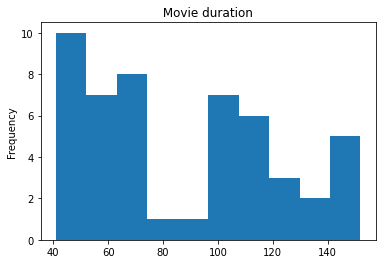

In [42]:
(df[df.type == 'Movie']['duration'].str.split(' ').str[0].astype(int)).value_counts()[:50].plot(kind='hist');
plt.title(' Movie duration ');

* Avg Duration of Movies is almost lie between   Mins

<a id='distRating'></a>
### What is the distribution of movie and TV show ratings on Netflix?

In [43]:
df.head(1)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,date_year,date_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9


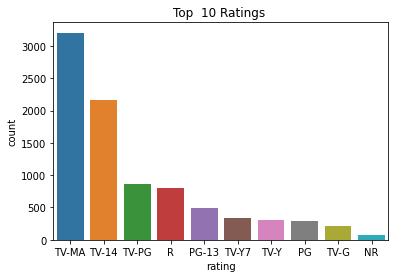

In [44]:
sns.countplot(x = df['rating'], order=df['rating'].value_counts().index[:10])
plt.title('Top  10 Ratings ') 
plt.show()

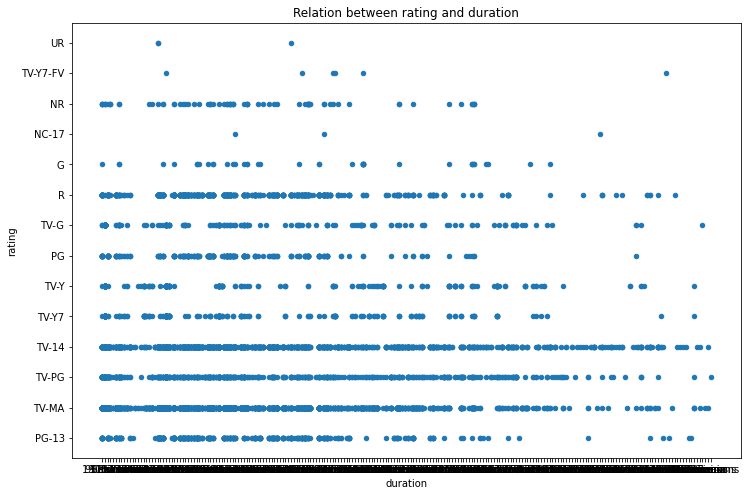

In [45]:
#Is there a relationship  between ratings and duration
# so we will use scatter plot
df.plot(x="duration", y="rating", kind="scatter", figsize = (12,8))
plt.ylabel('rating')
plt.xlabel('duration')
plt.title('Relation between rating and duration');

<a id='patterns'></a>
### Are there any patterns or trends in the release dates of TV shows and movies on Netflix?

In [46]:
df['release_year'].value_counts().nlargest(5)

2018    1146
2017    1030
2019    1030
2020     953
2016     901
Name: release_year, dtype: int64

In [47]:
df.groupby("release_year")["show_id"].count()

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1030
2018    1146
2019    1030
2020     953
2021     592
Name: show_id, Length: 74, dtype: int64

In [48]:
Trends=df.groupby("release_year")["show_id"].count().reset_index()
Trends.head(10)

,release_year,show_id
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
5,1946,2
6,1947,1
7,1954,2
8,1955,3
9,1956,2


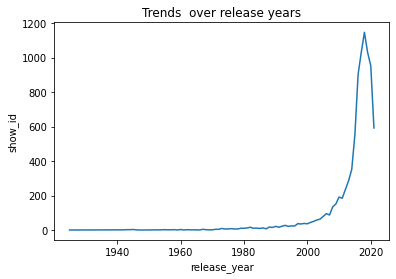

In [49]:
sns.lineplot(x = 'release_year' ,y = 'show_id',data =Trends)
plt.title("Trends  over release years")
plt.show(); 

In [50]:
last_trends=df.query("release_year >= 2010")
last_trends2=last_trends.groupby("release_year")["show_id"].count().reset_index()

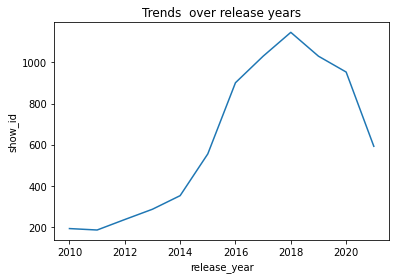

In [51]:
sns.lineplot(x = 'release_year',y = 'show_id',data =last_trends2)
plt.title("Trends  over release years")
plt.show(); 

#### notes:
* 2014 is begining of Movie/TV show expantion
* 2018 is the most were year Movie/TV show lunched 
* after 2018 there is a noticeable decline

<a id='gen'></a>
### What is the most Genres for Movies and TV Shows On Netflix?

In [52]:
print(df['listed_in'].str.split(","))

0                                         [Documentaries]
1       [Crime TV Shows,  International TV Shows,  TV ...
2                  [TV Dramas,  TV Horror,  TV Mysteries]
3                   [Children & Family Movies,  Comedies]
4       [Dramas,  Independent Movies,  International M...
                              ...                        
8785                 [International TV Shows,  TV Dramas]
8786                                           [Kids' TV]
8787    [International TV Shows,  Romantic TV Shows,  ...
8788                                           [Kids' TV]
8789                                           [Kids' TV]
Name: listed_in, Length: 8790, dtype: object


In [53]:
print(df['listed_in'].str.split("," , expand=True))

                             0                        1  \
0                Documentaries                     None   
1               Crime TV Shows   International TV Shows   
2                    TV Dramas                TV Horror   
3     Children & Family Movies                 Comedies   
4                       Dramas       Independent Movies   
...                        ...                      ...   
8785    International TV Shows                TV Dramas   
8786                  Kids' TV                     None   
8787    International TV Shows        Romantic TV Shows   
8788                  Kids' TV                     None   
8789                  Kids' TV                     None   

                           2  
0                       None  
1      TV Action & Adventure  
2               TV Mysteries  
3                       None  
4       International Movies  
...                      ...  
8785                    None  
8786                    None  
8787        

In [54]:
print(df['listed_in'].str.split(",",expand=True).stack())

0     0              Documentaries
1     0             Crime TV Shows
      1     International TV Shows
      2      TV Action & Adventure
2     0                  TV Dramas
                    ...           
8787  0     International TV Shows
      1          Romantic TV Shows
      2                  TV Dramas
8788  0                   Kids' TV
8789  0                   Kids' TV
Length: 19294, dtype: object


In [55]:
print(df['listed_in'].str.split(",",expand=True).stack().reset_index())

       level_0  level_1                        0
0            0        0            Documentaries
1            1        0           Crime TV Shows
2            1        1   International TV Shows
3            1        2    TV Action & Adventure
4            2        0                TV Dramas
...        ...      ...                      ...
19289     8787        0   International TV Shows
19290     8787        1        Romantic TV Shows
19291     8787        2                TV Dramas
19292     8788        0                 Kids' TV
19293     8789        0                 Kids' TV

[19294 rows x 3 columns]


In [56]:
print(df['listed_in'].str.split(",",expand=True).stack().reset_index(level=1))

      level_1                        0
0           0            Documentaries
1           0           Crime TV Shows
1           1   International TV Shows
1           2    TV Action & Adventure
2           0                TV Dramas
...       ...                      ...
8787        0   International TV Shows
8787        1        Romantic TV Shows
8787        2                TV Dramas
8788        0                 Kids' TV
8789        0                 Kids' TV

[19294 rows x 2 columns]


In [57]:
print(df['listed_in'].str.split(",",expand=True).stack().reset_index(level=1,drop=True))

0                 Documentaries
1                Crime TV Shows
1        International TV Shows
1         TV Action & Adventure
2                     TV Dramas
                 ...           
8787     International TV Shows
8787          Romantic TV Shows
8787                  TV Dramas
8788                   Kids' TV
8789                   Kids' TV
Length: 19294, dtype: object


In [58]:
#title  represent  "movies_count"and  "listed_in" represent "Genre"
genres =df.set_index('title').listed_in.str.split(",",expand=True).stack().reset_index(level=1,drop=True)

In [59]:
genres.value_counts()

 International Movies        2624
Dramas                       1599
Comedies                     1210
Action & Adventure            859
Documentaries                 829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
LGBTQ Movies                    1
TV Sci-Fi & Fantasy             1
Sports Movies                   1
Length: 73, dtype: int64

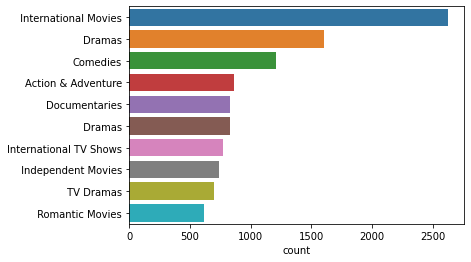

In [60]:
sns.countplot(y = genres, order=genres.value_counts().index[:10]);

* Most  three common genres are international movies ,Dramas  and Comedies

<a id='top'></a>
### What is the top Countries have diffrenet categories of genres?

In [61]:
top_categories = pd.DataFrame(df.groupby(['country','listed_in']).size().groupby(['country']).idxmax()).rename(
    columns={0:'top category'})

In [62]:
top_categories

,top category
country,
Argentina,"(Argentina, Dramas, International Movies)"
Australia,"(Australia, Docuseries, International TV Shows..."
Austria,"(Austria, Dramas, International Movies)"
Bangladesh,"(Bangladesh, Dramas, Independent Movies, Inter..."
Belarus,"(Belarus, British TV Shows, Kids' TV, TV Comed..."
...,...
Uruguay,"(Uruguay, Comedies, Dramas, International Movies)"
Venezuela,"(Venezuela, Documentaries, International Movies)"
Vietnam,"(Vietnam, Action & Adventure, Comedies, Intern..."


# what about Egypt?

In [63]:
top_categories.loc['Egypt']

top category    (Egypt, Comedies, International Movies)
Name: Egypt, dtype: object

<a id='years_needed'></a>
# How many years needed to add show to Netflix from it's releas..?

In [64]:
years_needed = df.date_year - df.release_year
years_needed = years_needed[years_needed<10]
print(f'Average needed years are:\t{years_needed.mean():1.2f} Years')

Average needed years are:	1.74 Years


# *Thanks*